data is taken from kaggle 
'Forest Cover Predection Type'

# Imports

In [12]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('data/covtype.csv')

In [14]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

## Check Statistics of data

In [15]:
pd.set_option('display.max_columns', None)
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Inferences
* Count is 581012
* Soil type 7,15,8 and 36 are constant(each value is zero), so they can be removed
* Wilderness_Area, Soil_type are one hot encoded. Hence, they could be converted back for some analysis.
* Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algorithms.

### Remove Unnecessary columns

In [16]:
df1 = df.copy()

remove_columns=[]

# Std = 0 are constant columns, they don't help in predection process
for col in df1.columns:
    if df1[col].std() <= 0.02: #std is 0
        remove_columns.append(col)

df1.drop(remove_columns, axis=1, inplace=True)

print(remove_columns)

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


Restoring the Original Values for better analysis


The target variable of our data i.e Cover_Type is one hot encoded

As Our data is already preprocessed but we will replace the forsteric values back to their original values for better analysis and data visualization.

In [17]:
df1['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow',
                  5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

In [18]:
df1 = df1.rename(columns={
    'Wilderness_Area1': 'Rawah_WA',
    'Wilderness_Area2': 'Neota_WA',
    'Wilderness_Area3': 'Comanche_Peak_WA',
    'Wilderness_Area4': 'Cache_la_Poudre_WA',
    'Horizontal_Distance_To_Hydrology': 'HD_Hydrology',
    'Vertical_Distance_To_Hydrology': 'VD_Hydrology',
    'Horizontal_Distance_To_Roadways': 'HD_Roadways',
    'Horizontal_Distance_To_Fire_Points': 'HD_Fire_Points'
})

In [22]:
df2 = df1.copy()
df2['Wild Areas'] = (df2.iloc[:,10:15]==1).idxmax(1)
df2['Soil Type'] = (df2.iloc[:,15:55]==1).idxmax(1)
df2['Wild Areas'].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

In [26]:
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

In [28]:
df = df2

In [29]:
df.head()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,Soil_Type29


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Elevation       581012 non-null  int64 
 1   Aspect          581012 non-null  int64 
 2   Slope           581012 non-null  int64 
 3   HD_Hydrology    581012 non-null  int64 
 4   VD_Hydrology    581012 non-null  int64 
 5   HD_Roadways     581012 non-null  int64 
 6   Hillshade_9am   581012 non-null  int64 
 7   Hillshade_Noon  581012 non-null  int64 
 8   Hillshade_3pm   581012 non-null  int64 
 9   HD_Fire_Points  581012 non-null  int64 
 10  Cover_Type      581012 non-null  object
 11  Wild Areas      581012 non-null  object
 12  Soil Type       581012 non-null  object
dtypes: int64(10), object(3)
memory usage: 57.6+ MB


## Exploring Data

In [31]:
# define Numerical and Categorical columns
numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']

print(f"We have {len(numerical_cols)} Numerical columns : {numerical_cols}")
print(f"We have {len(categorical_cols)} Categorical columns : {categorical_cols}")

We have 10 Numerical columns : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
We have 3 Categorical columns : ['Cover_Type', 'Wild Areas', 'Soil Type']


## Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable

### Numerical Features

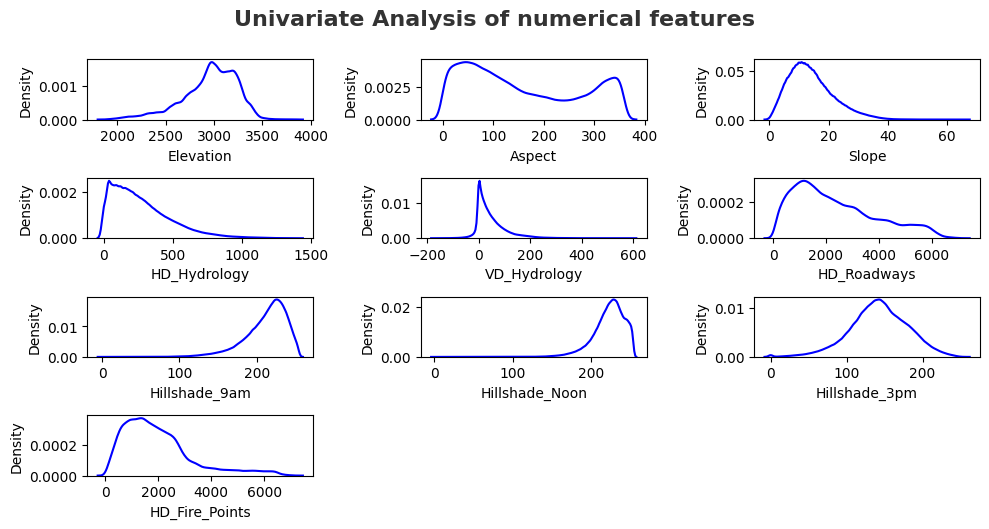

In [ ]:
plt.figure(figsize=(10,6))
plt.suptitle('Univariate Analysis of numerical features', fontsize = 16, fontweight = 'bold', alpha = 0.8, y=1.)

for i in range(0, len(numerical_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_cols[i]], color='blue')
    plt.xlabel(numerical_cols[i], fontsize=10)
    plt.tight_layout()

#save plot
#plt.savefig('./images/univariate_numerical.png')

### Categorical Features